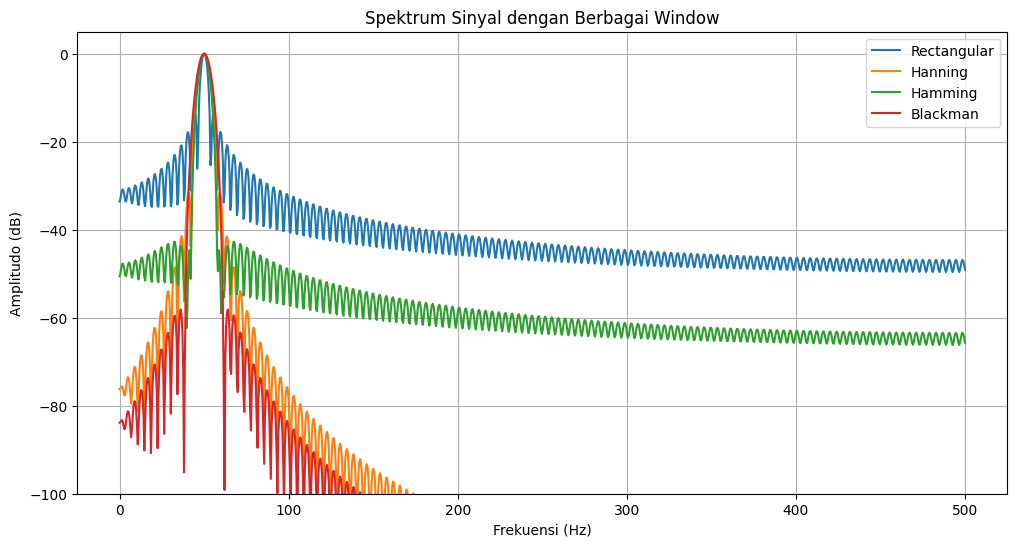

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal.windows import hann, hamming, blackman, boxcar
from numpy.fft import fft, fftfreq, fftshift

# 1. Parameter sinyal
fs = 1000       # Hz
f0 = 50         # frekuensi sinyal (Hz)
N = 256         # panjang sinyal
t = np.arange(N) / fs
x = np.sin(2 * np.pi * f0 * t)

# 2. Window functions
windows = {
    'Rectangular': boxcar(N),
    'Hanning': hann(N),
    'Hamming': hamming(N),
    'Blackman': blackman(N)
}

# 3. Plot FFT dari sinyal hasil windowing
plt.figure(figsize=(12, 6))

for name, w in windows.items():
    x_windowed = x * w
    X = np.abs(fft(x_windowed, 2048))  # zero-padding agar spektrumnya halus
    X = X[:1024]  # ambil hanya separuh (karena FFT simetris)
    freqs = np.linspace(0, fs/2, len(X))
    plt.plot(freqs, 20*np.log10(X / np.max(X)), label=name)  # dB scale

plt.title("Spektrum Sinyal dengan Berbagai Window")
plt.xlabel("Frekuensi (Hz)")
plt.ylabel("Amplitudo (dB)")
plt.legend()
plt.grid(True)
plt.ylim(-100, 5)
plt.show()
